In [62]:
import cv2
import matplotlib.pyplot as plt
import json
import numpy as np

In [63]:
with open('zubiiansarii-2025354591524346535-pose_2d.info') as f:
    data = json.load(f)

In [64]:
keypoints = data[0]['keypoints']

In [65]:
keypoints

[[105.5, 41.66666793823242],
 [113.0, 35.833335876464844],
 [100.5, 35.000003814697266],
 [122.16666412353516, 39.16666793823242],
 [93.83333587646484, 39.16666793823242],
 [129.6666717529297, 75.0],
 [78.83333587646484, 73.33333587646484],
 [135.5, 119.16666412353516],
 [73.0, 119.16666412353516],
 [144.6666717529297, 152.5],
 [84.66666412353516, 151.6666717529297],
 [126.33333587646484, 158.3333282470703],
 [100.5, 160.8333282470703],
 [126.33333587646484, 211.6666717529297],
 [90.5, 222.5],
 [126.33333587646484, 248.3333282470703],
 [77.16666412353516, 277.5]]

In [66]:
image_path = 'zubiiansarii-2025354591524346535.jpg'
image = cv2.imread(image_path)

image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

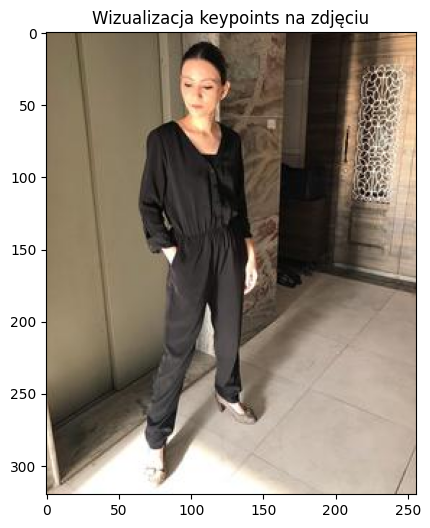

In [67]:
plt.figure(figsize=(6, 6))

# Wyświetl obraz z punktami
plt.imshow(image_rgb)
plt.title('Wizualizacja keypoints na zdjęciu')
plt.show()

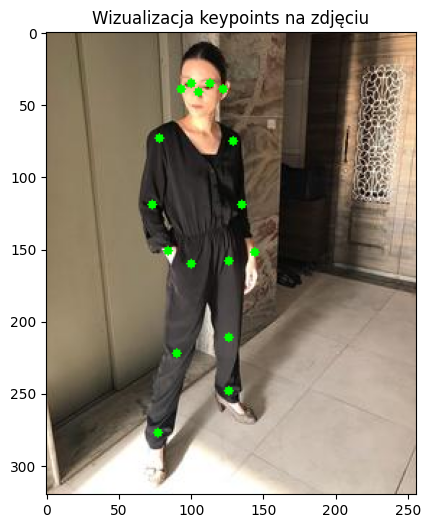

In [68]:
x_values = [int(point[0]) for point in keypoints]
y_values = [int(point[1]) for point in keypoints]

# Narysuj punkty na obrazie
for (x, y) in zip(x_values, y_values):
    cv2.circle(image_rgb, (x, y), 3, (0, 255, 0), -1)
    
plt.figure(figsize=(6, 6))

# Wyświetl obraz z punktami
plt.imshow(image_rgb)
plt.title('Wizualizacja keypoints na zdjęciu')
plt.show()

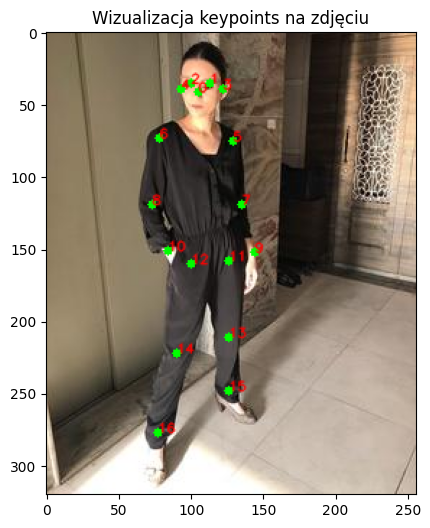

In [69]:
import cv2
import matplotlib.pyplot as plt

# Wczytaj zdjęcie
image_path = 'zubiiansarii-2025354591524346535.jpg'  # Zastąp 'sciezka_do_zdjecia.jpg' właściwą ścieżką do swojego zdjęcia
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Współrzędne punktów

# Konwertuj współrzędne punktów na liczby całkowite
x_values = [int(point[0]) for point in keypoints]
y_values = [int(point[1]) for point in keypoints]

# Narysuj punkty na obrazie i podpisz je
for i, (x, y) in enumerate(zip(x_values, y_values)):
    cv2.circle(image_rgb, (x, y), 3, (0, 255, 0), -1)
    cv2.putText(image_rgb, f'{i}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 0 , 0), 1, cv2.LINE_AA)

# Ustaw rozmiar wykresu
plt.figure(figsize=(6, 6))

# Wyświetl obraz z punktami
plt.imshow(image_rgb)
plt.title('Wizualizacja keypoints na zdjęciu')
plt.show()

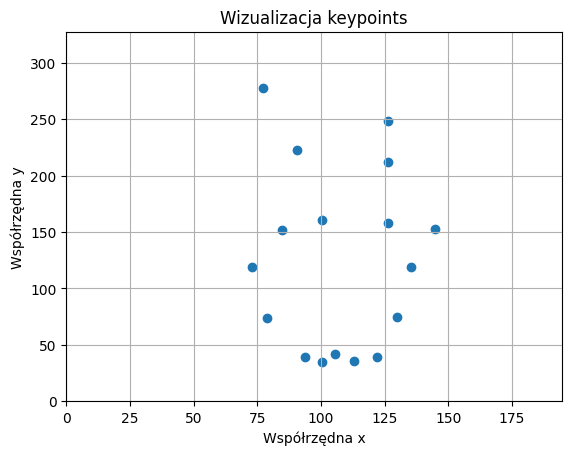

In [70]:
# Rozdzielenie współrzędnych x i y
x_values = [point[0] for point in keypoints]
y_values = [point[1] for point in keypoints]

# Utwórz wykres
plt.scatter(x_values, y_values)
plt.title('Wizualizacja keypoints')
plt.xlabel('Współrzędna x')
plt.ylabel('Współrzędna y')

# Ustaw zakres osi x i y, aby zaczynały się od 0
plt.xlim(0, max(x_values) + 50)  # Dodaj 10 jednostek do maksymalnej wartości x dla lepszego wyglądu
plt.ylim(0, max(y_values) + 50)  # Dodaj 10 jednostek do maksymalnej wartości y dla lepszego wyglądu

plt.grid(True)
plt.show()

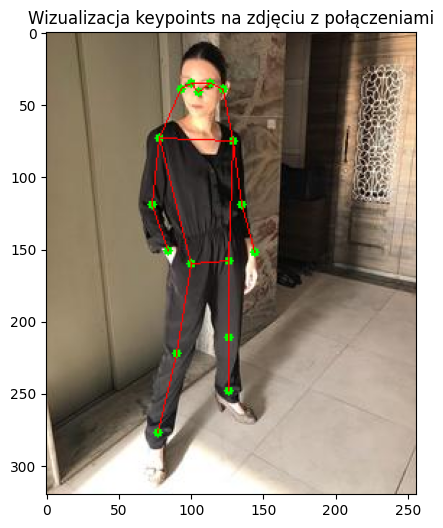

In [71]:
import cv2
import matplotlib.pyplot as plt

# Wczytaj zdjęcie
image_path = 'zubiiansarii-2025354591524346535.jpg'  # Zastąp 'sciezka_do_zdjecia.jpg' właściwą ścieżką do swojego zdjęcia
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Połączenia między punktami
connections = [(0, 1), (1, 3), (0, 2), 
               (1, 2), (2, 4), (4, 6), 
               (3, 5), (6, 5), (5, 11), 
               (11, 12), (12, 6), (6, 8), 
               (8, 10), (5, 7), (7, 9),
              (12, 14), (14, 16), (11, 13), (13, 15)]

# Konwertuj współrzędne punktów na liczby całkowite
x_values = [int(point[0]) for point in keypoints]
y_values = [int(point[1]) for point in keypoints]

# Narysuj punkty na obrazie
for (x, y) in zip(x_values, y_values):
    cv2.circle(image_rgb, (x, y), 3, (0, 255, 0), -1)

# Narysuj połączenia
for connection in connections:
    x_start, y_start = keypoints[connection[0]]
    x_end, y_end = keypoints[connection[1]]
    cv2.line(image_rgb, (int(x_start), int(y_start)), (int(x_end), int(y_end)), (255, 0, 0), 1)

# Ustaw rozmiar wykresu
plt.figure(figsize=(6, 6))

# Wyświetl obraz z punktami i połączeniami
plt.imshow(image_rgb)
plt.title('Wizualizacja keypoints na zdjęciu z połączeniami')
plt.show()

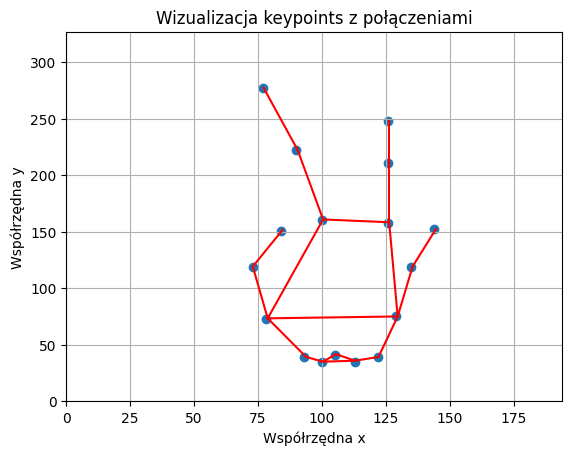

In [72]:
# Utwórz wykres
plt.scatter(x_values, y_values)
plt.title('Wizualizacja keypoints z połączeniami')
plt.xlabel('Współrzędna x')
plt.ylabel('Współrzędna y')

# Dodaj połączenia
for connection in connections:
    x_start, y_start = keypoints[connection[0]]
    x_end, y_end = keypoints[connection[1]]
    plt.plot([x_start, x_end], [y_start, y_end], color='red')

# Ustaw zakres osi x i y, aby zaczynały się od 0
plt.xlim(0, max(x_values) + 50)  # Dodaj 10 jednostek do maksymalnej wartości x dla lepszego wyglądu
plt.ylim(0, max(y_values) + 50)  # Dodaj 10 jednostek do maksymalnej wartości y dla lepszego wyglądu

plt.grid(True)
plt.show()

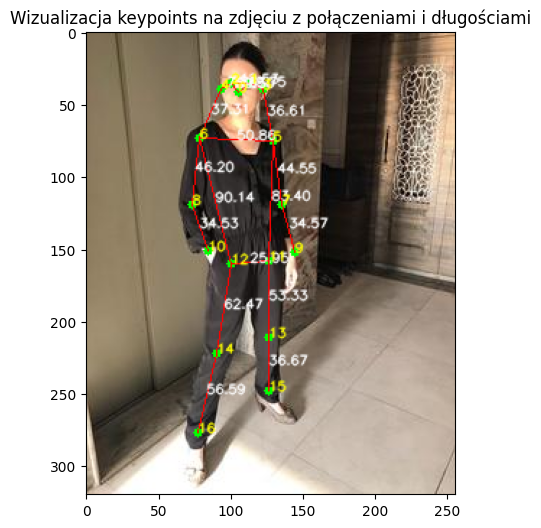

In [73]:
import cv2
import matplotlib.pyplot as plt
import math

# Wczytaj zdjęcie
image_path = 'zubiiansarii-2025354591524346535.jpg'  # Zastąp 'sciezka_do_zdjecia.jpg' właściwą ścieżką do swojego zdjęcia
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Połączenia między punktami
connections = [(0, 1), (1, 3), (0, 2), 
               (1, 2), (2, 4), (4, 6), 
               (3, 5), (6, 5), (5, 11), 
               (11, 12), (12, 6), (6, 8), 
               (8, 10), (5, 7), (7, 9),
               (12, 14), (14, 16), (11, 13), (13, 15)]

# Konwertuj współrzędne punktów na liczby całkowite
x_values = [int(point[0]) for point in keypoints]
y_values = [int(point[1]) for point in keypoints]

# Narysuj punkty na obrazie
for (x, y) in zip(x_values, y_values):
    cv2.circle(image_rgb, (x, y), 3, (0, 255, 0), -1)

dist = []

for connection in connections:
    x_start, y_start = keypoints[connection[0]]
    x_end, y_end = keypoints[connection[1]]
    cv2.line(image_rgb, (int(x_start), int(y_start)), (int(x_end), int(y_end)), (255, 0, 0), 1)

    # Oblicz długość połączenia
    distance = math.sqrt((x_end - x_start)**2 + (y_end - y_start)**2)
    
    dist.append(distance)

    # Wyświetl długość na obrazie
    cv2.putText(image_rgb, f'{distance:.2f}', (int((x_start + x_end) / 2), int((y_start + y_end) / 2)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA)

for i, (x, y) in enumerate(zip(x_values, y_values)):
    cv2.putText(image_rgb, f'{i}', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255,255,0), 1, cv2.LINE_AA)

# Ustaw rozmiar wykresu
plt.figure(figsize=(6, 6))

# Wyświetl obraz z punktami, połączeniami i długościami
plt.imshow(image_rgb)
plt.title('Wizualizacja keypoints na zdjęciu z połączeniami i długościami')
plt.show()


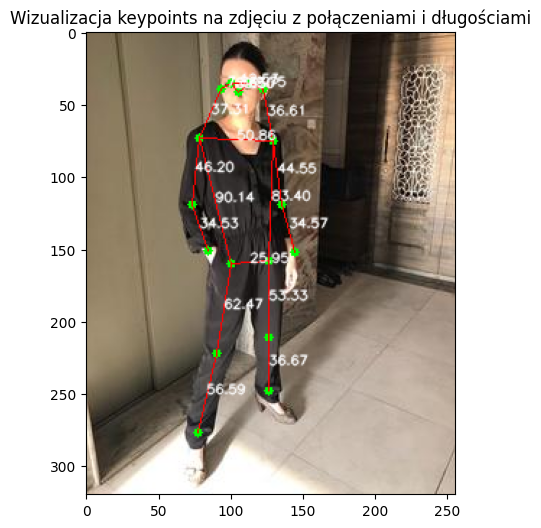

In [74]:
import cv2
import matplotlib.pyplot as plt
import math

# Wczytaj zdjęcie
image_path = 'zubiiansarii-2025354591524346535.jpg'  # Zastąp 'sciezka_do_zdjecia.jpg' właściwą ścieżką do swojego zdjęcia
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Połączenia między punktami
connections = [(0, 1), (1, 3), (0, 2), 
               (1, 2), (2, 4), (4, 6), 
               (3, 5), (6, 5), (5, 11), 
               (11, 12), (12, 6), (6, 8), 
               (8, 10), (5, 7), (7, 9),
               (12, 14), (14, 16), (11, 13), (13, 15)]

# Konwertuj współrzędne punktów na liczby całkowite
x_values = [int(point[0]) for point in keypoints]
y_values = [int(point[1]) for point in keypoints]

# Narysuj punkty na obrazie
for (x, y) in zip(x_values, y_values):
    cv2.circle(image_rgb, (x, y), 3, (0, 255, 0), -1)

dist = []

for connection in connections:
    x_start, y_start = keypoints[connection[0]]
    x_end, y_end = keypoints[connection[1]]
    cv2.line(image_rgb, (int(x_start), int(y_start)), (int(x_end), int(y_end)), (255, 0, 0), 1)

    # Oblicz długość połączenia
    distance = math.sqrt((x_end - x_start)**2 + (y_end - y_start)**2)
    
    dist.append(distance)
    # Wyświetl długość na obrazie
    cv2.putText(image_rgb, f'{distance:.2f}', (int((x_start + x_end) / 2), int((y_start + y_end) / 2)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA)
    


# Ustaw rozmiar wykresu
plt.figure(figsize=(6, 6))

# Wyświetl obraz z punktami, połączeniami i długościami
plt.imshow(image_rgb)
plt.title('Wizualizacja keypoints na zdjęciu z połączeniami i długościami')
plt.show()


In [75]:
np.array(dist)

array([ 9.5014611 ,  9.75391377,  8.3333313 , 12.5277469 ,  7.86164744,
       37.31435646, 36.60980471, 50.86065086, 83.39996837, 25.9540217 ,
       90.14262587, 46.20304953, 34.53058858, 44.55021816, 34.57078466,
       62.47222107, 56.59309009, 53.33334351, 36.66665649])

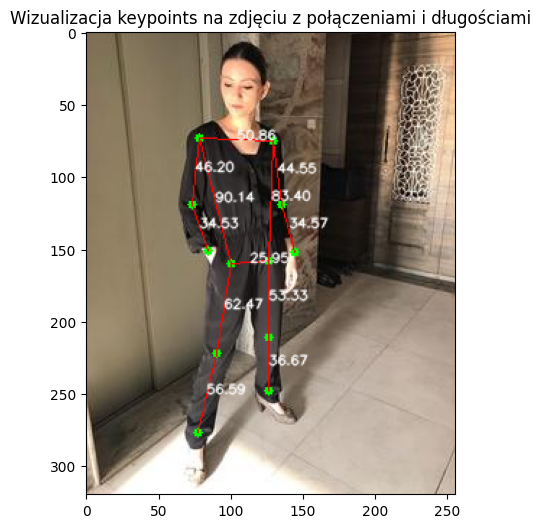

In [76]:
import cv2
import matplotlib.pyplot as plt
import math

# Wczytaj zdjęcie
image_path = 'zubiiansarii-2025354591524346535.jpg'  # Zastąp 'sciezka_do_zdjecia.jpg' właściwą ścieżką do swojego zdjęcia
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Połączenia między punktami
connections = [(6, 5), (5, 11), 
               (11, 12), (12, 6), (6, 8), 
               (8, 10), (5, 7), (7, 9),
               (12, 14), (14, 16), (11, 13), (13, 15)]

# Konwertuj współrzędne punktów na liczby całkowite
x_values = [int(point[0]) for i,point in enumerate(keypoints) if i not in [0,1,2,3,4]]
y_values = [int(point[1]) for i,point in enumerate(keypoints) if i not in [0,1,2,3,4]]

# Narysuj punkty na obrazie
for (x, y) in zip(x_values, y_values):
    cv2.circle(image_rgb, (x, y), 3, (0, 255, 0), -1)

dist = []

for connection in connections:
    x_start, y_start = keypoints[connection[0]]
    x_end, y_end = keypoints[connection[1]]
    cv2.line(image_rgb, (int(x_start), int(y_start)), (int(x_end), int(y_end)), (255, 0, 0), 1)

    # Oblicz długość połączenia
    distance = math.sqrt((x_end - x_start)**2 + (y_end - y_start)**2)
    
    dist.append(distance)
    # Wyświetl długość na obrazie
    cv2.putText(image_rgb, f'{distance:.2f}', (int((x_start + x_end) / 2), int((y_start + y_end) / 2)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA)
    


# Ustaw rozmiar wykresu
plt.figure(figsize=(6, 6))

# Wyświetl obraz z punktami, połączeniami i długościami
plt.imshow(image_rgb)
plt.title('Wizualizacja keypoints na zdjęciu z połączeniami i długościami')
plt.show()


In [77]:
dist_array = np.array(dist)

In [78]:
dist_array

array([50.86065086, 83.39996837, 25.9540217 , 90.14262587, 46.20304953,
       34.53058858, 44.55021816, 34.57078466, 62.47222107, 56.59309009,
       53.33334351, 36.66665649])

In [79]:
normalized_data = (dist_array - np.min(dist_array)) / (np.max(dist_array) - np.min(dist_array))

print("Znormalizowane dane:")
print(normalized_data)

Znormalizowane dane:
[0.3880226  0.89495554 0.         1.         0.31546141 0.1336151
 0.28971181 0.13424132 0.56892029 0.47732878 0.4265449  0.16689309]


In [80]:
n_data = (dist_array / dist_array[0])

In [81]:
n_data

array([1.        , 1.63977391, 0.51029669, 1.77234511, 0.90842427,
       0.67892542, 0.87592702, 0.67971573, 1.22830164, 1.11270873,
       1.04861701, 0.72092386])

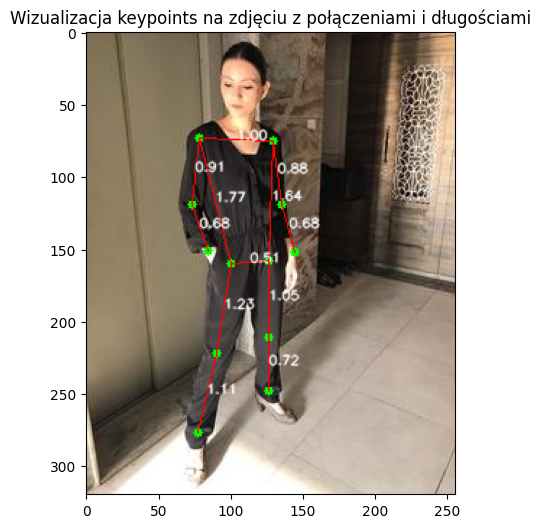

In [82]:
import cv2
import matplotlib.pyplot as plt
import math

# Wczytaj zdjęcie
image_path = 'zubiiansarii-2025354591524346535.jpg'  # Zastąp 'sciezka_do_zdjecia.jpg' właściwą ścieżką do swojego zdjęcia
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)


# Połączenia między punktami
connections = [(6, 5), (5, 11), 
               (11, 12), (12, 6), (6, 8), 
               (8, 10), (5, 7), (7, 9),
               (12, 14), (14, 16), (11, 13), (13, 15)]

# Konwertuj współrzędne punktów na liczby całkowite
x_values = [int(point[0]) for i,point in enumerate(keypoints) if i not in [0,1,2,3,4]]
y_values = [int(point[1]) for i,point in enumerate(keypoints) if i not in [0,1,2,3,4]]

# Narysuj punkty na obrazie
for (x, y) in zip(x_values, y_values):
    cv2.circle(image_rgb, (x, y), 3, (0, 255, 0), -1)


for i,connection in enumerate(connections):
    x_start, y_start = keypoints[connection[0]]
    x_end, y_end = keypoints[connection[1]]
    cv2.line(image_rgb, (int(x_start), int(y_start)), (int(x_end), int(y_end)), (255, 0, 0), 1)

    # Oblicz długość połączenia
    scale = n_data[i]
    
    cv2.putText(image_rgb, f'{scale:.2f}', (int((x_start + x_end) / 2), int((y_start + y_end) / 2)),
                cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1, cv2.LINE_AA)
    


# Ustaw rozmiar wykresu
plt.figure(figsize=(6, 6))

# Wyświetl obraz z punktami, połączeniami i długościami
plt.imshow(image_rgb)
plt.title('Wizualizacja keypoints na zdjęciu z połączeniami i długościami')
plt.show()
